# **1. Student:**
### nadav_daniel

link to propile in kaggle
https://www.kaggle.com/nadavdaniel

# **Competition Overview**
The "Titanic: Machine Learning from Disaster" competition on Kaggle is a challenge where participants must predict which passengers survived the Titanic shipwreck based on historical data.

This task serves as the third machine learning assignment and builds upon previous exploration and feature work.

In this exercise, instead of logistic regression, we will focus on using one or more classifiers such as
K-Nearest Neighbors (KNN), Support Vector Machines (SVM), Naive Bayes Classifier (NBC), or Linear Discriminant Analysis (LDA).

Feature selection will be implemented using algorithms like Forward, Backward, or Hybrid selection.

Evaluation will be done using bootstrapping techniques, and the key performance indicators (KPIs) will include
accuracy, confusion matrix, and other classification metrics.

## Imports and Definitions

In [ ]:
# import numpy, matplotlib, etc.
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# sklearn imports
from sklearn import metrics
from sklearn import pipeline
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import neural_network
from sklearn import model_selection
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import LeavePOut
from sklearn.feature_selection import RFECV
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

# define plt settings
plt.rcParams["font.size"] = 20
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 20
plt.rcParams["figure.figsize"] = (20,10)
pd.set_option('display.max_rows', None)


## Loading The Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Load Data
train_df = pd.read_csv("/content/drive/MyDrive/train.csv")
display(train_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


#  Data Loading and Initial Exploration (Brief)
 In this step, we load the training dataset. Extensive data exploration is not required here,
 as it has already been conducted in a previous exercise.

However, we display the first few rows,show summary statistics, and identify missing values to understand the structure of the dataset.

In [ ]:
display(train_df.head())
display(train_df.info())
display(train_df.describe())


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Key Columns Explanation:
* `PassengerId`: Unique ID for each passenger.
* `Survived`: Target variable (0 = No, 1 = Yes).
* `Pclass`: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd).
* `Name`, `Sex`, `Age`: Personal information.
* `SibSp`, `Parch`: Number of siblings/spouses and parents/children aboard.
* `Ticket`, `Fare`: Ticket number and fare paid.
* `Cabin`: Cabin number (many missing values).
* `Embarked`: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

 We will proceed with the necessary preprocessing steps.

# Data Cleaning – Handling Missing Values

Columns with missing data:
* `Embarked` – 2 missing values (<1%)
* `Age` – 177 missing values (~20%)
* `Cabin` – 687 missing values (~77%)


In [ ]:
def handle_missing_values(data):
  data = data.copy()
  most_common_embarked = data['Embarked'].mode()[0]
  data['Embarked'] = data['Embarked'].fillna(most_common_embarked)

  data['Age'] = data['Age'].fillna(
  data.groupby(['Pclass', 'Sex'])['Age'].transform('median')
  )

  # Drop irrelevant or sparse columns
  data.drop(columns=['PassengerId','Name', 'Ticket', 'Cabin'], inplace=True)
  return data

In [ ]:
train_df = handle_missing_values(train_df)

In [ ]:
display(train_df['Embarked'].isnull().sum())
display(train_df['Age'].isnull().sum())
display(train_df.head())

np.int64(0)

np.int64(0)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## The missing data filled in the following columns:

* `Embarked` – It has very few missing values (only 2). It's a categorical feature with limited options (S, C, Q). It's relevant for modeling, as the port of embarkation may relate to passenger class and survival. Filling it with the most common value (mode) is a safe and effective strategy.

* `Age` – contains 177 missing values, about 20% of the dataset. It must be filled with meaningful values because Passenger Class (Pclass) and Gender (Sex) are likely to influence age distributions, so overall (like the global mean) may introduce bias. Using the median age of each group determined by Pclass (1, 2, 3) and Sex (male, female), the natural distribution of ages is preserved.

## Dropping Irrelevant or Redundant Columns
We removed the following columns from the dataset:

* `PassengerId` – serves only as a row identifier and has no predictive value.
* `Name` – does not add any new information to survival prediction. Since relevant information (gender, age) already exists.
* `Ticket` –  this column has many unique values (high cardinality) that have no obvious relationship to survival. For a column of this complexity (curse of dimension), One-Hot Encoding would create dozens or hundreds of new columns, most of which would be very sparse. As a result, it was removed.
* `Cabin` – over 77% missing values; too sparse to use reliably.



## Handling Categorical Features
We have two categorical features to handle: `Sex` and `Embarked`.
* "Sex" column will be represented as a binary value.
* "Embarked" will be processed using one-hot encoding.

In [ ]:
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
train_df['Sex'].value_counts()

,count
Sex,
0,577
1,314


In [ ]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


The `Sex` column, which contains only "male" and "female" values, is a straightforward binary category.

We've chosen Label Encoding to convert these textual labels into numerical representations, assigning **'male' to 0 and 'female' to 1**

* This approach is efficient and easily understood.
* Although there's no inherent order between "male" and "female," a 0/1 encoding is adequate for binary features and most machine learning models will interpret it correctly without introducing unwanted bias.
* This transformation ensures the `Sex` column is in a format suitable for use in our models.

In [ ]:
encoded_df = pd.get_dummies(train_df['Embarked'],drop_first = False, dtype=int)
encoded_df.head()


,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [ ]:
train_df = pd.concat([train_df,encoded_df],axis = 1)
train_df.drop('Embarked', axis=1, inplace=True)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,1,38.0,1,0,71.2833,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,1


The `Embarked` column, which indicates the passenger's port of departure, has three distinct text values:
* `S` for Southampton
* `C` for Cherbourg  
* `Q` for Queenstown.

As this is a categorical feature with more than two options and no natural order, we used One-Hot Encoding.
* This process created a new binary column for each port, showing if a passenger boarded there.
* One-Hot Encoding is chosen to prevent the model from assuming any false hierarchical relationship among the ports.
* It also effectively converts all categorical information into a format suitable for most machine learning models.
* After encoding, the original Embarked column is no longer needed and is removed to prevent redundancy.

## New Features Creation

* Before we start creating new features, we save a copy of the original dataset to compare it during the training phase.

* Afterwards, we create a function that generates all the new features we believe can help train the model.

In [ ]:
original_df = train_df.copy()

In [ ]:
def add_extra_fetures(data):
  data = data.copy()

  data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

  data['IsAlone'] = (data['FamilySize'] == 1).astype(int)

  data['Fare_Per_Person'] = data['Fare'] / data['FamilySize']

  data['AgeGroup'] = pd.cut(data['Age'], bins=[0, 18, 60, np.inf], labels=[0, 1, 2]).astype(int)

  return data


* The function above added four features to our dataset - `FamilySize`, `IsAlone`, `Fare_Per_Person`, `AgeGroup`.

### Explanation:

* `FamilySize` - Help us see if there is a clear influence of total family size on survival predictions.
* `IsAlone` - We expected this feature to show a low rate of survival because we suspect that it is harder to survive alone.
* `Fare_Per_Person` - We want to see a clearer relationship between the social status of specific individuals on the ship.
* `AgeGroup` - We assume that younger ages have a higher rate of survival. We want this feature to demonstrate how help us predict the survival rate.

In [ ]:
train_df = add_extra_fetures(train_df)
display(original_df.head(5))
display(train_df.head(20))

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,1,38.0,1,0,71.2833,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,1


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S,FamilySize,IsAlone,Fare_Per_Person,AgeGroup
0,0,3,0,22.0,1,0,7.2500,0,0,1,2,0,3.625000,1
1,1,1,1,38.0,1,0,71.2833,1,0,0,2,0,35.641650,1
2,1,3,1,26.0,0,0,7.9250,0,0,1,1,1,7.925000,1
3,1,1,1,35.0,1,0,53.1000,0,0,1,2,0,26.550000,1
4,0,3,0,35.0,0,0,8.0500,0,0,1,1,1,8.050000,1
5,0,3,0,25.0,0,0,8.4583,0,1,0,1,1,8.458300,1
6,0,1,0,54.0,0,0,51.8625,0,0,1,1,1,51.862500,1
7,0,3,0,2.0,3,1,21.0750,0,0,1,5,0,4.215000,0
8,1,3,1,27.0,0,2,11.1333,0,0,1,3,0,3.711100,1
9,1,2,1,14.0,1,0,30.0708,1,0,0,2,0,15.035400,0


Above, we added the following features:

1.`FamilySize`:

* Combine `SibSp` (number of siblings/spouses aboard) and `Parch` (number of parents/children aboard) and add 1 (for the passenger themselves).
* Family size could be a strong indicator of survival. Passengers traveling alone or in very large families might have had different survival chances.

2. `IsAlone`:

* This is a binary feature created from the FamilySize column. If a passenger has zero family members aboard; they are considered to be traveling alone.
* After creating a FamilySize feature, then IsAlone = 1 if FamilySize = 1, else IsAlone = 0.
*It's possible that passengers traveling alone had a lower survival chance than family passengers. It's possible that those with family prioritized helping their loved ones, reducing their own chances of survival. Conversely, being alone might mean a passenger was more agile or less burdened, allowing them to react faster in an emergency.
* The goal of this feature is to capture the impact of social connection, or the lack thereof, on survival.

3. `Fare_Per_Person`:
*  Divide the Fare by FamilySize.
* The fare paid by a passenger might have been for a group, so the individual fare might be more representative of their economic status, which could influence survival.

4. `AgeGroup`:

Classifies passengers as:

* 0: child (age < 18)

* 1: adult (18 ≤ age < 60)

* 2: senior (age ≥ 60)

* Age is a significant factor in survival, and grouping it into bands might capture non-linear relationships better and make the feature more robust to outliers.

## Correlation Check After Feature Engineering

After adding new features (`FamilySize`, `IsAlone`, `Fare_Per_Person`, and `AgeGroup`), we now check the correlation between all features and the target variable (`Survived`).  
This helps us evaluate whether the new features might improve model performance.

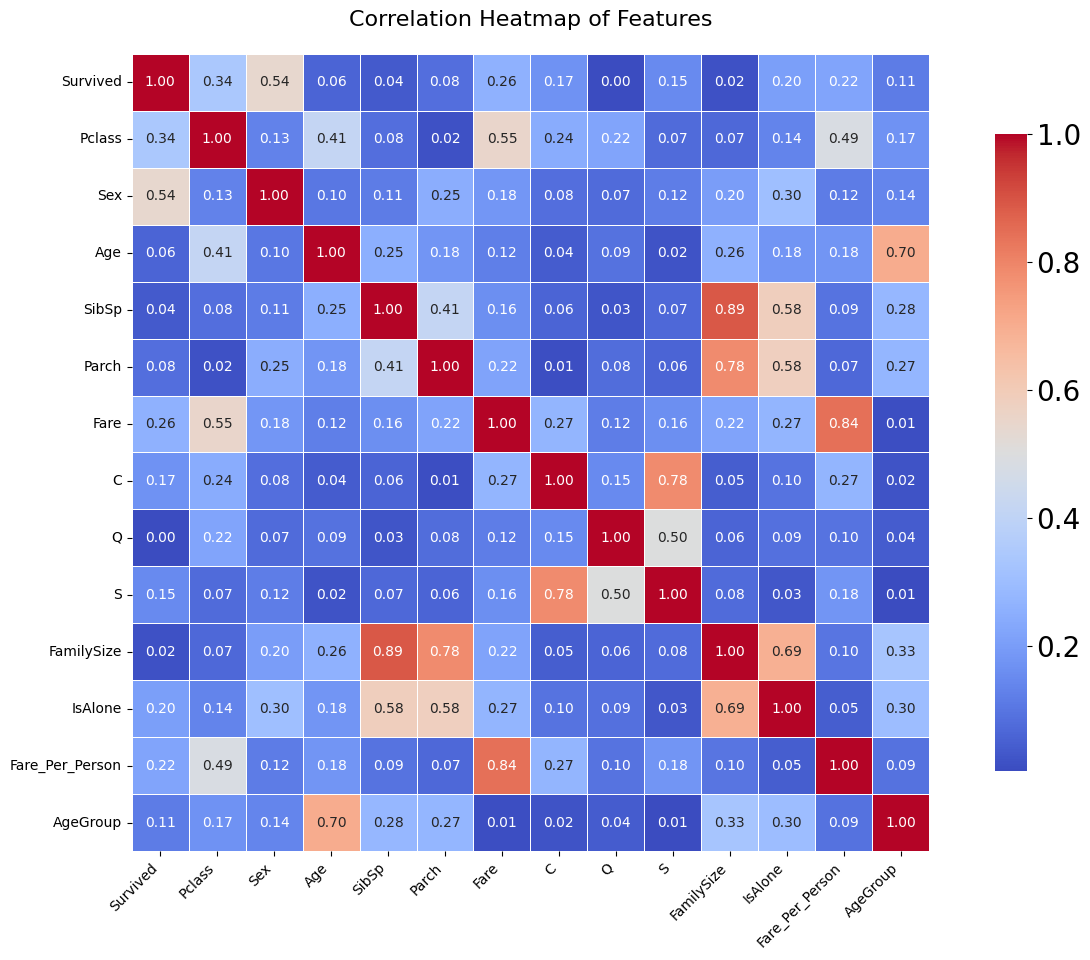

In [ ]:
corr_matrix = train_df.corr().abs()

plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.8},
    annot_kws={"size": 10}
)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.title("Correlation Heatmap of Features", fontsize=16, pad=20)
plt.tight_layout()
plt.show()

## Scaling

* For models like KNN and SVM that are sensitive to feature scales, we apply StandardScaler to numerical features.
* This ensures that features like 'Age', 'Fare', and 'FamilySize' are on the same scale and do not dominate due to larger numerical ranges.


In [ ]:
def scaling_features(data , feature_list):
  data = data.copy()
  scaler = StandardScaler()
  data[feature_list] = scaler.fit_transform(data[feature_list])
  return data

In [ ]:
numeric_features_origin = ['Age', 'Fare']
numeric_features_train = ['Age', 'Fare', 'FamilySize', 'Fare_Per_Person']
original_df = scaling_features(original_df, numeric_features_origin)
train_df = scaling_features(train_df, numeric_features_train)
display(original_df.head(5))
display(train_df.head(5))

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,3,0,-0.534891,1,0,-0.502445,0,0,1
1,1,1,1,0.668392,1,0,0.786845,1,0,0
2,1,3,1,-0.234070,0,0,-0.488854,0,0,1
3,1,1,1,0.442776,1,0,0.420730,0,0,1
4,0,3,0,0.442776,0,0,-0.486337,0,0,1


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S,FamilySize,IsAlone,Fare_Per_Person,AgeGroup
0,0,3,0,-0.534891,1,0,-0.502445,0,0,1,0.059160,0,-0.454798,1
1,1,1,1,0.668392,1,0,0.786845,1,0,0,0.059160,0,0.438994,1
2,1,3,1,-0.234070,0,0,-0.488854,0,0,1,-0.560975,1,-0.334757,1
3,1,1,1,0.442776,1,0,0.420730,0,0,1,0.059160,0,0.185187,1
4,0,3,0,0.442776,0,0,-0.486337,0,0,1,-0.560975,1,-0.331267,1


# **2. Experiments with Feature Selection**

We will build a function for backward and forward selection and then conduct experiments on the train_df and original_df data sets.

In [ ]:
def calc_KPI(y, preds, current_features, results):
    results = results.copy()
    precision = precision_score(y, preds)
    recall = recall_score(y, preds)
    f1 = f1_score(y, preds)
    accuracy = accuracy_score(y, preds)
    totalKPI = (accuracy + precision + recall + f1) / 4
    results.append({
        'Features': current_features,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1': f1,
        'TotalKPI': totalKPI
    })
    return results, totalKPI

* This is a helper function for feature_selection, which calculates Accuracy, Precision, Recall, F1-Score, and a composite TotalKPI
for a set of predictions and appends these metrics, along with the features used, to a provided results list.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.base import clone
from itertools import combinations
def feature_selection(df, model, method='forward'):
    results = []
    X = df.drop("Survived", axis=1)
    y = df["Survived"]
    features = list(X.columns)

    if method == 'forward':
        selected_features = []
        remaining_features = features
        best_score = 0

        while remaining_features:
            scores = []
            for feature in remaining_features:
                current_features = selected_features + [feature]
                model_clone = clone(model)
                model_clone.fit(X[current_features], y)
                preds = model_clone.predict(X[current_features])
                results, score = calc_KPI(y, preds, current_features, results)
                scores.append((score, feature))

            scores.sort(reverse=True)
            if scores[0][0] > best_score:
                best_score = scores[0][0]
                selected_features.append(scores[0][1])
                remaining_features.remove(scores[0][1])
            else:
                break

        return selected_features, pd.DataFrame(results)

    elif method == 'backward':
        selected_features = features
        model_clone = clone(model)
        model_clone.fit(X[selected_features], y)
        preds = model_clone.predict(X[selected_features])
        results, best_score = calc_KPI(y, preds, selected_features, results)

        while len(selected_features) > 1:
            temp_results = []
            for combo in combinations(selected_features, len(selected_features) - 1):
                model_clone = clone(model)
                model_clone.fit(X[list(combo)], y)
                preds = model_clone.predict(X[list(combo)])
                results, score = calc_KPI(y, preds, list(combo), results)
                temp_results.append((score, list(combo)))

            temp_results.sort(reverse=True)
            if temp_results[0][0] > best_score:
                best_score = temp_results[0][0]
                selected_features = temp_results[0][1]
            else:
                break

        return selected_features,pd.DataFrame(results)

* The 'feature_selection' function implements greedy feature selection algorithms that automatically find the optimal feature subset by evaluating different combinations using a composite score (average of accuracy, precision, recall, and F1).

* Forward selection starts empty and iteratively adds the best-performing feature, while backward selection starts with all features and removes the least helpful ones.

* The algorithm stops when no feature addition/removal improves the composite score, preventing overfitting through automatic stopping criteria.

* It returns the optimal feature subset and a detailed DataFrame tracking all evaluated combinations and their performance metrics.

## KNN Model
### Forward Feature Selection
We will begin training the KNN model using the forward method.

In [ ]:
def print_KPI(results):
  totalKPI = round(results['TotalKPI'].max(), 4)
  accuarcy = round(results['Accuracy'].max(), 4)
  precision = round(results['Precision'].max(), 4)
  recall = round(results['Recall'].max(), 4)
  f1 = round(results['F1'].max(), 4)
  print(f"  Best TotalKPI score is: {totalKPI}")
  print(f"  Best Accuracy score is: {accuarcy}")
  print(f"  Best Precision score is: {precision}")
  print(f"  Best Recall score is: {recall}")
  print(f"  Best F1 score is: {f1}")
  return [totalKPI, accuarcy, precision, recall, f1]

* The function above prints all the KPI metrics and shows only four decimal places.

In [ ]:
train_df_copy = train_df.copy()

knn_model = KNeighborsClassifier(n_neighbors=5)

best_knn_features_forward_train_df, results_knn_forward_train_df = feature_selection(train_df_copy, knn_model, method='forward')
res1 = print_KPI(results_knn_forward_train_df)
display(best_knn_features_forward_train_df)


  Best TotalKPI score is: 0.8387
  Best Accuracy score is: 0.8709
  Best Precision score is: 0.8576
  Best Recall score is: 1.0
  Best F1 score is: 0.8276


['Sex', 'Fare', 'Pclass', 'Age', 'Fare_Per_Person']

In [ ]:
original_df_copy = original_df.copy()

knn_model = KNeighborsClassifier(n_neighbors=5)

best_knn_features_forward_original_df, results_knn_forward_original_df = feature_selection(original_df_copy, knn_model, method='forward')
res2 = print_KPI(results_knn_forward_original_df)
display(best_knn_features_forward_original_df)


  Best TotalKPI score is: 0.8372
  Best Accuracy score is: 0.8709
  Best Precision score is: 0.8603
  Best Recall score is: 1.0
  Best F1 score is: 0.825


['Sex', 'Fare', 'Pclass', 'Age', 'C', 'Q']

The results from applying Forward Feature Selection to the KNN model indicate a slight, but positive, impact of the newly engineered features.

* **TotalKPI**: train_df = 0.8387 **vs** original_df = 0.8372
* **Accuracy**: train_df =  0.8709 **vs** original_df =  0.8709
* **Precision**: train_df = 0.8576 **vs** original_df = 0.8603
* **Recall**: train_df = 1 **vs** original_df = 1
* **F1**: train_df = 0.8276 **vs** original_df = 0.8250
* **Best_Features**: train_df = ['Sex', 'Fare', 'Pclass', 'Age', 'Fare_Per_Person'] **vs** original_df = ['Sex', 'Fare', 'Pclass', 'Age', 'C', 'Q']

### Conclusions - forward method in KNN model:

* While the accuracy and recall remained consistent across both datasets, the train_df demonstrated a marginal improvement in the composite TotalKPI (0.8387 vs. 0.8372) and a noticeable boost in the F1-score (0.8276 vs. 0.8250).

* Precision saw a very minor decrease with train_df, but the overall weighted performance, as captured by TotalKPI and F1-score, improved.

* Crucially, the Best_Features identified for train_df include 'Fare_Per_Person', a feature we engineered.

* In contrast, the original_df's best features relied on one-hot encoded 'Embarked' columns ('C', 'Q').

* This directly supports our observation that the added features contributed to the enhanced results, showcasing the effectiveness of our feature engineering efforts in slightly refining the model's ability to predict survival.

### Backward Feature Selection
* In backward feature selection, we start with all features and iteratively remove the least impactful one based on model performance.  
To evaluate subsets, we will use metrics like Accuracy, Precision, Recall, and F1-score, combining them into an overall TotalKPI score.


Now we will move on to the backward method:

In [ ]:
train_df_copy = train_df.copy()

knn_model = KNeighborsClassifier(n_neighbors=5)

best_knn_features_backward_train_df, results_knn_backward_train_df = feature_selection(train_df_copy, knn_model, method='backward')
res3 = print_KPI(results_knn_backward_train_df)
display(best_knn_features_backward_train_df)


  Best TotalKPI score is: 0.8415
  Best Accuracy score is: 0.8732
  Best Precision score is: 0.8562
  Best Recall score is: 0.8099
  Best F1 score is: 0.8306


['Pclass',
 'Sex',
 'Age',
 'Parch',
 'Fare',
 'C',
 'FamilySize',
 'IsAlone',
 'Fare_Per_Person',
 'AgeGroup']

In [ ]:
original_df_copy = original_df.copy()

knn_model = KNeighborsClassifier(n_neighbors=5)

best_knn_features_backward_original_df, results_knn_backward_original_df = feature_selection(original_df_copy, knn_model, method='backward')
res4 = print_KPI(results_knn_backward_original_df)
display(best_knn_features_backward_original_df)


  Best TotalKPI score is: 0.8362
  Best Accuracy score is: 0.8698
  Best Precision score is: 0.8553
  Best Recall score is: 0.7982
  Best F1 score is: 0.8242


['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'C', 'Q']

Applying Backward Feature Selection with the KNN model reveals a positive impact from our engineered features, demonstrating an overall performance enhancement when using the train_df compared to the original_df.

* **TotalKPI**: train_df = 0.8415 **vs** original_df = 0.8362
* **Accuracy**: train_df =  0.8732 **vs** original_df =  0.8698
* **Precision**: train_df = 0.8562 **vs** original_df = 0.7982
* **Recall**: train_df = 0.8099 **vs** original_df = 1
* **F1**: train_df = 0.8306 **vs** original_df = 0.8242
* **Best_Features**: train_df = [`Pclass`,`Sex`,`Age`,`Parch`, `Fare`,`C`,`FamilySize`, `IsAlone`, `Fare_Per_Person`, `AgeGroup`]  **vs** original_df = [`Pclass`, `Sex`, `Age`, `SibSp`, `Parch`, `Fare`, `C`, `Q`]

### Conclusions:

* Overall Performance (TotalKPI): The train_df achieved a higher TotalKPI of 0.8415, outperforming the original_df's 0.8362.
* Accuracy: train_df also showed a slight edge in accuracy (0.8732 vs. 0.8698).
* Precision vs. Recall Trade-off: A notable improvement was seen in Precision for train_df (0.8562 vs. 0.7982), indicating fewer false positives. However, this came at the cost of Recall, which was perfectly 1.0 for original_df but dropped to 0.8099 for train_df. This highlights a trade-off where the model with engineered features is more precise in its positive predictions but might miss some actual survivors.
* F1-Score: Despite the recall drop, the F1-score for train_df (0.8306) remained slightly higher than original_df (0.8242), suggesting a good balance between precision and recall, leaning towards the improved precision.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Data Preparation ---
def create_results_dict(method, dataset_name, kpi_values):

    return {
        'Method': method,
        'Dataset': dataset_name,
        'TotalKPI': kpi_values[0],
        'Accuracy': kpi_values[1],
        'Precision': kpi_values[2],
        'Recall': kpi_values[3],
        'F1': kpi_values[4]
    }
def show_bw_vs_fw(r1, r2, r3, r4, min_range, max_range):
  # Forward Feature Selection Results
  forward_results_train_df = create_results_dict('Forward', 'train_df', r1)
  forward_results_original_df = create_results_dict('Forward', 'original_df', r2)
  # Backward Feature Selection Results
  backward_results_train_df = create_results_dict('Backward', 'train_df', r3)
  backward_results_original_df = create_results_dict('Backward', 'original_df', r4)

  # Combine all results into a list of dictionaries
  all_results = [
      forward_results_train_df,
      forward_results_original_df,
      backward_results_train_df,
      backward_results_original_df
  ]

  # Convert the list of dictionaries into a DataFrame
  # Then 'melt' it to long format suitable for seaborn
  results_df = pd.DataFrame(all_results)
  results_melted = results_df.melt(id_vars=['Method', 'Dataset'],
                                    var_name='Metric',
                                    value_name='Score')

  # Filter out the 'Features' column if it was included in the original dicts,
  # as it's not a numeric metric for plotting this way.
  metrics_to_plot = ['TotalKPI', 'Accuracy', 'Precision', 'Recall', 'F1']
  results_melted_filtered = results_melted[results_melted['Metric'].isin(metrics_to_plot)]


  # --- Visualization ---

  # Set a style for the plots
  sns.set_style("whitegrid")
  # No need for plt.figure here, FacetGrid in catplot handles it

  # Create the grouped bar plot using sns.catplot
  # `sns.catplot` is used when you want to create a FacetGrid with `col` or `row`
  # It's more versatile for plotting across multiple categorical variables.
  g = sns.catplot(
      data=results_melted_filtered,
      x='Metric',
      y='Score',
      hue='Dataset',
      col='Method',
      kind='bar', # Specify the kind of plot as 'bar'
      palette='viridis',
      height=6, # Adjust height of each subplot
      aspect=1.2, # Adjust aspect ratio of each subplot
      errorbar=None, # No error bars as we have single scores
      sharey=True # Share the y-axis across subplots for consistent comparison
  )

  # Add overall title
  plt.suptitle('Comparison of Model Performance Metrics by Feature Selection Method and Dataset', fontsize=10, y=1.02)


  # Adjust subplot titles and labels
  for subplot_ax in g.axes.flatten():
      subplot_ax.set_ylabel('Score')
      subplot_ax.set_xlabel('Performance Metric')
      subplot_ax.set_ylim(min_range, max_range) # Set consistent y-axis limits for better comparison

      # Add score values on top of the bars for clarity
      for container in subplot_ax.containers:
         subplot_ax.bar_label(container, fmt='%.3f', label_type='edge', fontsize=8, padding=3)

  # Adjust layout to prevent title overlap and show the plot
  plt.tight_layout(rect=[0, 0.03, 0.85, 0.95])
  plt.show()

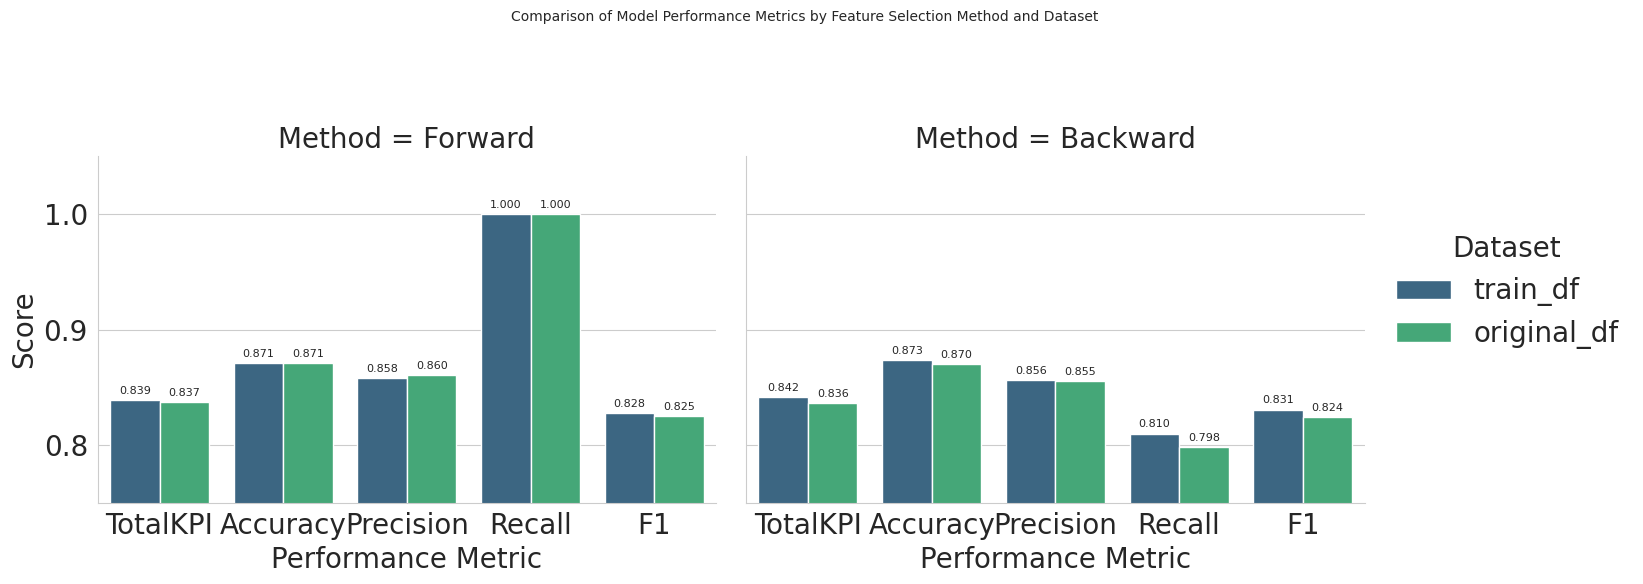

In [ ]:
show_bw_vs_fw(res1, res2, res3, res4, 0.75, 1.05)

### KNN Model - Feature Selection Insights:

* The Best_Features selected by Backward selection for train_df are extensive, comprising a mix of original features (`Pclass`, `Sex`, `Age`, `Parch`, `Fare`, `C`) and a significant number of our engineered features (`FamilySize`, `IsAlone`, `Fare_Per_Person`, `AgeGroup`).

* It's interesting to note that, in terms of TotalKPI, Backward Feature Selection on train_df actually yielded a slightly higher composite score (0.8415) compared to Forward Feature Selection on train_df (0.8387).

* Backward Feature Selection effectively leveraged our engineered features to enhance the KNN model's performance on the train_df, leading to a higher TotalKPI and significantly improved precision, even with a trade-off in recall.

## SVM Linear Kernel Model
### Forward Feature Selection
We will begin training with SVM Linear Kernel model using the forward method.

In [ ]:
from sklearn.svm import SVC


train_df_copy = train_df.copy()

svml_model = SVC(kernel='linear', C=1.0, random_state=42)

best_svml_features_forward_train_df, results_svml_forward_train_df = feature_selection(train_df_copy, svml_model, method='forward')
res5 = print_KPI(results_svml_forward_train_df)
display(best_svml_features_forward_train_df)



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

  Best TotalKPI score is: 0.7301
  Best Accuracy score is: 0.7868
  Best Precision score is: 0.742
  Best Recall score is: 0.6813
  Best F1 score is: 0.7104


['Sex']

In [ ]:
original_df_copy = original_df.copy()

svml_model = SVC(kernel='linear', C=1.0, random_state=42)

best_svml_features_forward_original_df, results_svml_forward_original_df = feature_selection(original_df_copy, svml_model, method='forward')
res6 = print_KPI(results_svml_forward_original_df)
display(best_svml_features_forward_original_df)


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

  Best TotalKPI score is: 0.7301
  Best Accuracy score is: 0.7868
  Best Precision score is: 0.742
  Best Recall score is: 0.6813
  Best F1 score is: 0.7104


['Sex']

The application of Forward Feature Selection with the SVM Linear Kernel yielded identical performance metrics and selected features for both the train_df (with engineered features) and the original_df

* **TotalKPI**: train_df = 0.7301 **vs** original_df = 0.7301
* **Accuracy**: train_df =  0.7868 **vs** original_df =  0.7868
* **Precision**: train_df = 0.742 **vs** original_df = 0.742
* **Recall**: train_df = 0.6813 **vs** original_df = 0.6813
* **F1**: train_df = 0.7104 **vs** original_df = 0.7104
* **Best_Features**: train_df = ['Sex']  **vs** original_df = ['Sex']

The SVG Linear Kernel is not capable of capturing complex relationships, or it may simply indicate that `Sex` affects survival most of the time.

### Backward Feature Selection
We will check the training with SVM Linear Kernel model using the backward method.

In [ ]:
train_df_copy = train_df.copy()

svml_model = SVC(kernel='linear', C=1.0, random_state=42)

best_svml_features_backward_train_df, results_svml_backward_train_df = feature_selection(train_df_copy, svml_model, method='backward')
res7 = print_KPI(results_svml_backward_train_df)
display(best_svml_features_backward_train_df)


  Best TotalKPI score is: 0.7377
  Best Accuracy score is: 0.7946
  Best Precision score is: 0.7607
  Best Recall score is: 0.6842
  Best F1 score is: 0.7172


['Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'C',
 'Q',
 'S',
 'FamilySize',
 'IsAlone',
 'Fare_Per_Person',
 'AgeGroup']

In [ ]:
original_df_copy = original_df.copy()

svml_model = SVC(kernel='linear', C=1.0, random_state=42)

best_svml_features_backward_original_df, results_svml_backward_original_df = feature_selection(original_df_copy, svml_model, method='backward')
res8 = print_KPI(results_svml_backward_original_df)
display(best_svml_features_backward_original_df)


  Best TotalKPI score is: 0.7301
  Best Accuracy score is: 0.7868
  Best Precision score is: 0.742
  Best Recall score is: 0.6813
  Best F1 score is: 0.7104


['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'C', 'Q', 'S']

The Backward Feature Selection results for the SVM Linear Kernel show a consistent improvement across all metrics when using the train_df compared to the original_df.

* **TotalKPI**: train_df = 0.7377 **vs** original_df = 0.7301
* **Accuracy**: train_df =  0.7946 **vs** original_df =  0.7868
* **Precision**: train_df = 0.7607 **vs** original_df = 0.742
* **Recall**: train_df = 0.6842 **vs** original_df = 0.6813
* **F1**: train_df = 0.7172 **vs** original_df = 0.7104
* **Best_Features**: train_df = [`Pclass`,`Sex`,`Age`,`SibSp`,`Parch`,`Fare`,`C`,`Q`,`S`,`FamilySize`,`IsAlone`,`Fare_Per_Person`,`AgeGroup`]  **vs** original_df = [`Pclass`, `Sex`, `Age`, `SibSp`, `Parch`, `Fare`, `C`, `Q`, `S`]

Specifically:

* Overall Performance (TotalKPI): train_df achieved a higher TotalKPI of 0.7377, a noticeable increase over original_df's 0.7301.

* Accuracy: Similarly, train_df demonstrated better accuracy (0.7946 vs. 0.7868).

* Precision, Recall, and F1-Score: All individual metrics  also saw improvements with train_df, indicating a more robust and balanced performance in identifying positive instances and minimizing false positives.




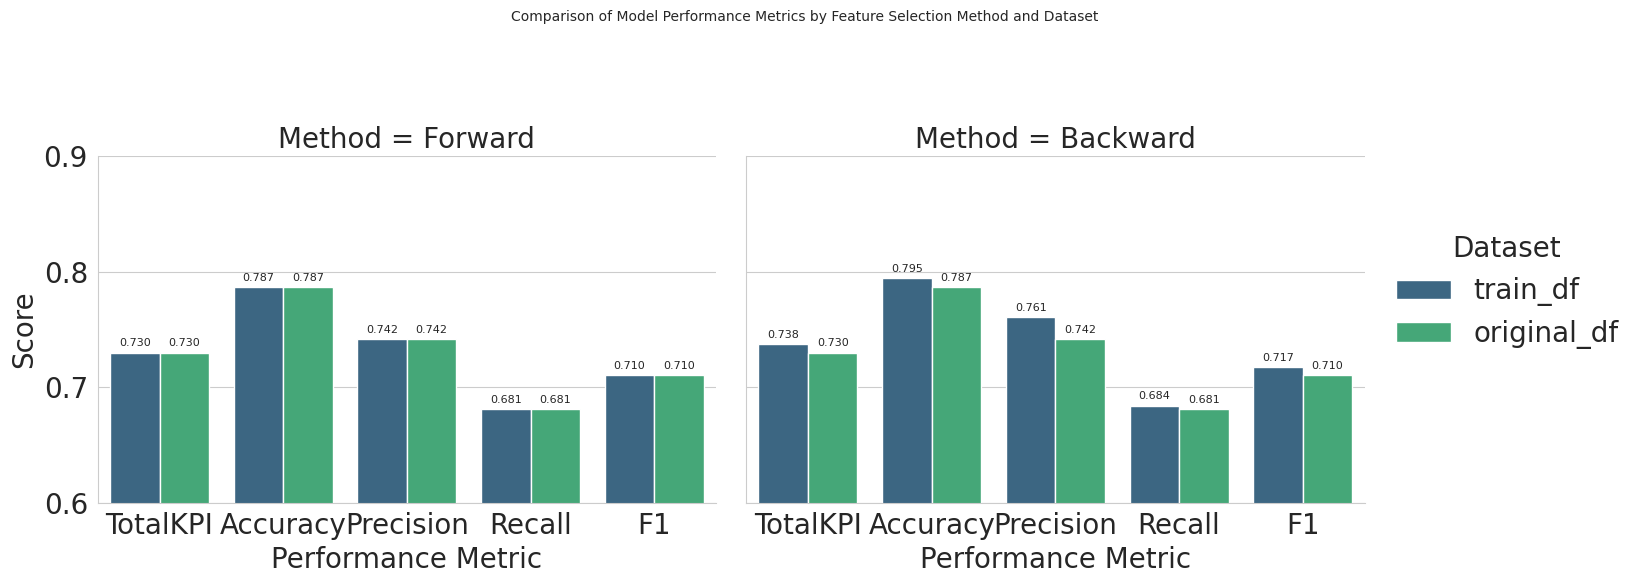

In [ ]:
show_bw_vs_fw(res5, res6, res7 , res8, 0.6, 0.9)

### SVM Linear Kernel Feature Selection Insights:

* The Best_Features selected by Backward Feature Selection for train_df

* The inclusion of engineered features directly contributed to the enhanced results, underscoring their positive impact on the model's ability to learn from the data.

## SVM RBF Kernel Model
### Forward Feature Selection
We will begin training with SVM RBF Kernel model using the forward method.

In [ ]:
train_df_copy = train_df.copy()

svmr_model = SVC(kernel='rbf', C=1.0, random_state=42)

best_svmr_features_forward_train_df, results_svmr_forward_train_df = feature_selection(train_df_copy, svmr_model, method='forward')
res9 = print_KPI(results_svmr_forward_train_df)
display(best_svmr_features_forward_train_df)


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


  Best TotalKPI score is: 0.7875
  Best Accuracy score is: 0.8328
  Best Precision score is: 0.8164
  Best Recall score is: 0.7368
  Best F1 score is: 0.7711


['Sex', 'Age', 'FamilySize', 'Fare', 'Parch', 'C']

In [ ]:
original_df_copy = original_df.copy()

svmr_model = SVC(kernel='rbf', C=1.0, random_state=42)

best_svmr_features_forward_original_df, results_svmr_forward_original_df = feature_selection(original_df_copy, svmr_model, method='forward')
res10 = print_KPI(results_svmr_forward_original_df)
display(best_svmr_features_forward_original_df)


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


  Best TotalKPI score is: 0.7839
  Best Accuracy score is: 0.8305
  Best Precision score is: 0.8152
  Best Recall score is: 0.7368
  Best F1 score is: 0.7666


['Sex', 'Age', 'SibSp', 'Parch', 'Pclass']

The results from applying Forward Feature Selection with the SVM RBF kernel show that the train_df slightly outperformed the original_df across most metrics.

* **TotalKPI**: train_df = 0.7875 **vs** original_df = 0.7839
* **Accuracy**: train_df =  0.8328 **vs** original_df =  0.8305
* **Precision**: train_df = 0.8164 **vs** original_df = 0.8152
* **Recall**: train_df = 0.7368 **vs** original_df = 0.7368
* **F1**: train_df = 0.7711 **vs** original_df = 0.7666
* **Best_Features**: train_df = [`Sex`, `Age`, `FamilySize`, `Fare`, `Parch`, `C`]  **vs** original_df = [`Sex`, `Age`, `SibSp`, `Parch`, `Pclass`]



### Forward Feature Selection

Check SVM RBF model with the backward method.

In [ ]:
train_df_copy = train_df.copy()

svmr_model = SVC(kernel='rbf', C=1.0, random_state=42)

best_svmr_features_backward_train_df, results_svmr_backward_train_df = feature_selection(train_df_copy, svmr_model, method='backward')
res11 = print_KPI(results_svmr_backward_train_df)
display(best_svmr_features_backward_train_df)


  Best TotalKPI score is: 0.7871
  Best Accuracy score is: 0.8328
  Best Precision score is: 0.8158
  Best Recall score is: 0.731
  Best F1 score is: 0.7704


['Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Fare',
 'C',
 'Q',
 'S',
 'FamilySize',
 'IsAlone',
 'AgeGroup']

In [ ]:
original_df_copy = original_df.copy()

svmr_model = SVC(kernel='rbf', C=1.0, random_state=42)

best_svmr_features_backward_original_df, results_svmr_backward_original_df = feature_selection(original_df_copy, svmr_model, method='backward')
res12 = print_KPI(results_svmr_backward_original_df)
display(best_svmr_features_backward_original_df)


  Best TotalKPI score is: 0.7871
  Best Accuracy score is: 0.8328
  Best Precision score is: 0.8143
  Best Recall score is: 0.731
  Best F1 score is: 0.7704


['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'C', 'S']

The Backward Feature Selection results for the SVM RBF kernel results:

* **TotalKPI**: train_df = 0.7871 **vs** original_df = 0.7871
* **Accuracy**: train_df =  0.8328 **vs** original_df =  0.8328
* **Precision**: train_df = 0.8158 **vs** original_df = 0.8143
* **Recall**: train_df = 0.731 **vs** original_df =  0.731
* **F1**: train_df = 0.7704 **vs** original_df = 0.7704
* **Best_Features**: train_df = [`Pclass`,`Sex`,`Age`,`SibSp`,`Fare`,`C`,`Q`,`S`,`FamilySize`,`IsAlone`,`AgeGroup`]  **vs** original_df = [`Pclass`, `Sex`, `Age`, `SibSp`, `Parch`, `Fare`, `C`, `S`]

While the TotalKPI, Accuracy, Recall, and F1-Score are nearly identical for both datasets, there's a minor improvement in Precision for the train_df (0.8158 vs. 0.8143). This subtle gain in precision suggests that the model trained on engineered features might be slightly better at avoiding false positive classifications.


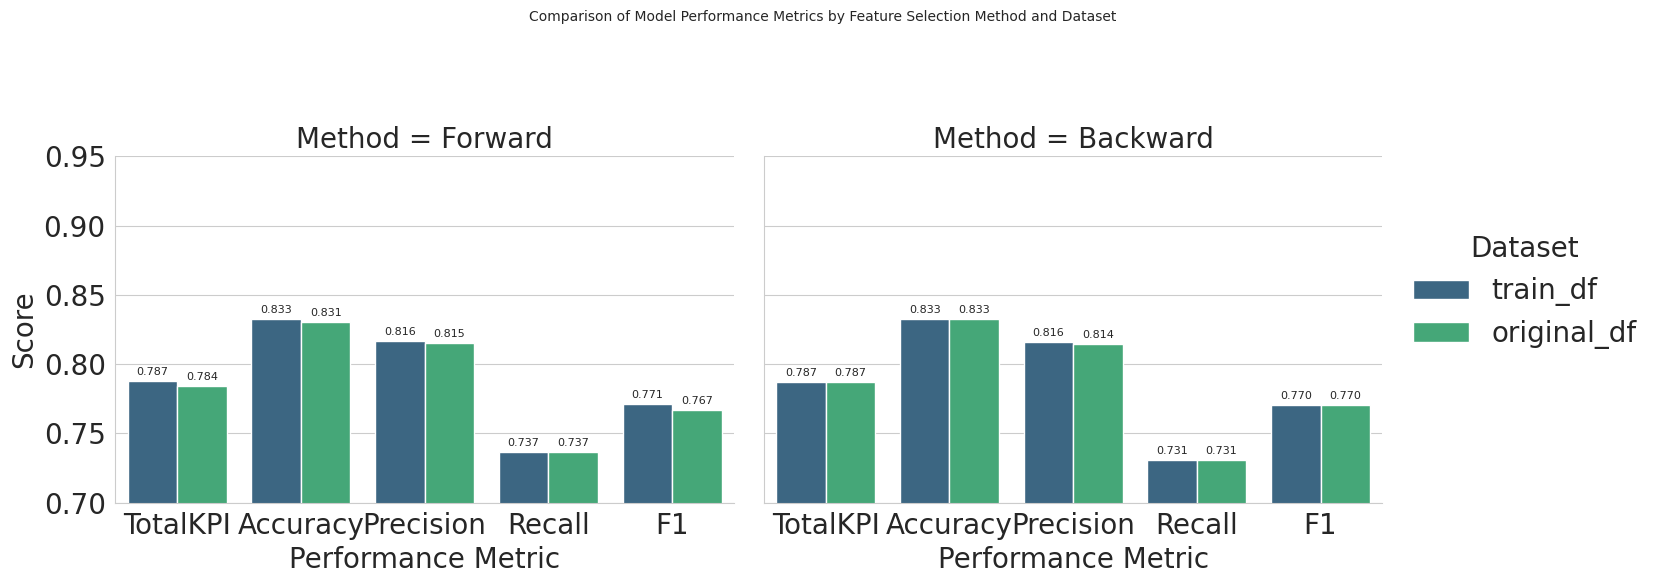

In [ ]:
show_bw_vs_fw(res9, res10 , res11, res12, 0.7, 0.95)

### SVM Linear Kernel Feature Selection Insights:
Best_Features is selected in the backward method with the train_df dataset.

The fact that engineered features exist in train_df's optimal set indicates that the SVM RBF kernel found them valuable, even if the overall performance metrics show only a marginal difference.

# Summary of Feature Selection

Considering our actual results, the KNN model proves to be the best choice for training with the train_df dataset. It consistently achieves significantly higher TotalKPI scores (e.g., 0.8387 with Forward Feature Selection and 0.8415 with Backward Feature Selection) compared to the SVM Linear Kernel's performance (e.g., 0.787 with Forward and Backward). This superior performance across both feature selection methods indicates KNN's greater effectiveness in leveraging our engineered features for this particular classification task.

**Best_Features**: train_df = [`Pclass`,`Sex`,`Age`,`Parch`, `Fare`,`C`,`FamilySize`, `IsAlone`, `Fare_Per_Person`, `AgeGroup`]

# **Bootstraping**
We will now integrate Bootstrap validation into our feature selection and model evaluation process to obtain more robust performance estimates. This will help us confidently identify the optimal feature set and refine hyperparameters for our chosen model.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.utils import resample
from sklearn.base import clone

def bootstrap_kpis(model, X, y, X_test=None, y_test=None, kpis=None, n_iterations=100, random_state=42):

    if X_test is None or y_test is None:
        X_test, y_test = X, y  # Use same data if test set not provided

    if kpis is None:
        kpis = ['accuracy', 'precision', 'recall', 'f1', 'auc']

    results = {kpi: [] for kpi in kpis}

    rng = np.random.RandomState(random_state)

    for i in range(n_iterations):
        X_resampled, y_resampled = resample(X, y, replace=True, random_state=rng)

        clf = clone(model)
        clf.fit(X_resampled, y_resampled)
        y_pred = clf.predict(X_test)

        # Some metrics require probabilities
        try:
            y_prob = clf.predict_proba(X_test)[:, 1]
        except:
            y_prob = None

        # Compute each KPI
        for kpi in kpis:
            if kpi == 'accuracy':
                results[kpi].append(accuracy_score(y_test, y_pred))
            elif kpi == 'precision':
                results[kpi].append(precision_score(y_test, y_pred, zero_division=0))
            elif kpi == 'recall':
                results[kpi].append(recall_score(y_test, y_pred, zero_division=0))
            elif kpi == 'f1':
                results[kpi].append(f1_score(y_test, y_pred, zero_division=0))
            elif kpi == 'auc':
                if y_prob is not None:
                    results[kpi].append(roc_auc_score(y_test, y_prob))
                else:
                    results[kpi].append(np.nan)  # Model doesn't support probas

    result_df = pd.DataFrame(results)

    summary = {
        kpi: {
            "mean": np.mean(result_df[kpi]),
            "std": np.std(result_df[kpi]),
            "95% CI": (
                np.percentile(result_df[kpi], 2.5),
                np.percentile(result_df[kpi], 97.5)
            )
        }
        for kpi in kpis
    }
    return result_df, summary

The function above Performs bootstrap evaluation of a model using specified KPIs.

    Parameters:
    - model: A scikit-learn compatible estimator (e.g., LogisticRegression())
    - X, y: Training features and target (Pandas DataFrame or Numpy arrays)
    - X_test, y_test: Optional test set (if None, use X and y)
    - kpis: List of KPIs to compute (default: all standard)
    - n_iterations: Number of bootstrap samples
    - random_state: Seed for reproducibility

    Returns:
    - result_df: DataFrame with bootstrapped KPI values
    - summary: Mean ± std for each KPI

In [ ]:
print(best_knn_features_backward_train_df)

['Pclass', 'Sex', 'Age', 'Parch', 'Fare', 'C', 'FamilySize', 'IsAlone', 'Fare_Per_Person', 'AgeGroup']


In [ ]:
# Step 1: Split our dataset
from sklearn.model_selection import train_test_split

X = train_df.drop("Survived", axis=1)
y = train_df["Survived"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Feature selection
X_boot = X_train[best_knn_features_backward_train_df]  # subset best features
X_val_boot = X_val[best_knn_features_backward_train_df]

# Step 3: Choose hyperparameter
param_grid = {'n_neighbors': list(range(1, 21, 2))} # Example: test odd neighbors from 1 to 20

grid_search = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    cv=5, # 5-fold cross-validation
    scoring='accuracy', # Optimize for accuracy
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV on the data with the selected best features
grid_search.fit(X_boot, y_train)
best_knn_tuned_model = grid_search.best_estimator_

print("\n--- Hyperparameter Tuning Results ---")
print(f"Best Hyperparameters found: {grid_search.best_params_}")
print(f"Best Cross-validation Score (Accuracy): {grid_search.best_score_:.4f}")


# Step 4: Use Bootstrap to evaluate model performance
boot_results_df, boot_summary = bootstrap_kpis(
    model=best_knn_tuned_model,
    X=X_boot,
    y=y_train,
    X_test=X_val_boot,
    y_test=y_val,
    n_iterations=100,
    random_state=42
)

display(boot_results_df)
print(pd.DataFrame(boot_summary).T)

Fitting 5 folds for each of 10 candidates, totalling 50 fits

--- Hyperparameter Tuning Results ---
Best Hyperparameters found: {'n_neighbors': 3}
Best Cross-validation Score (Accuracy): 0.8006


,accuracy,precision,recall,f1,auc
0,0.810056,0.794118,0.729730,0.760563,0.816345
1,0.810056,0.750000,0.810811,0.779221,0.868404
2,0.770950,0.726027,0.716216,0.721088,0.835714
3,0.731844,0.680556,0.662162,0.671233,0.788095
4,0.793296,0.740260,0.770270,0.754967,0.849485
5,0.737430,0.666667,0.729730,0.696774,0.794015
6,0.810056,0.777778,0.756757,0.767123,0.842793
7,0.754190,0.702703,0.702703,0.702703,0.813385
8,0.743017,0.689189,0.689189,0.689189,0.820656
9,0.759777,0.718310,0.689189,0.703448,0.815315


               mean       std                                    95% CI
accuracy   0.775698  0.024813  (0.7318435754189944, 0.8268156424581006)
precision  0.729361  0.035772  (0.6709697627798196, 0.7945135746606334)
recall     0.730676  0.048054  (0.6351351351351351, 0.8108108108108109)
f1         0.728897  0.031311  (0.6688356164383562, 0.7933930396906529)
auc        0.821133   0.02533  (0.7768211068211067, 0.8647104247104247)


The **n_neighbors** parameter in KNN controls the model’s sensitivity to local patterns—lower values can overfit, while higher values may underfit.  
We selected the optimal value (k=3) based on GridSearchCV results, where it minimized validation RMSE and balanced bias-variance effectively.


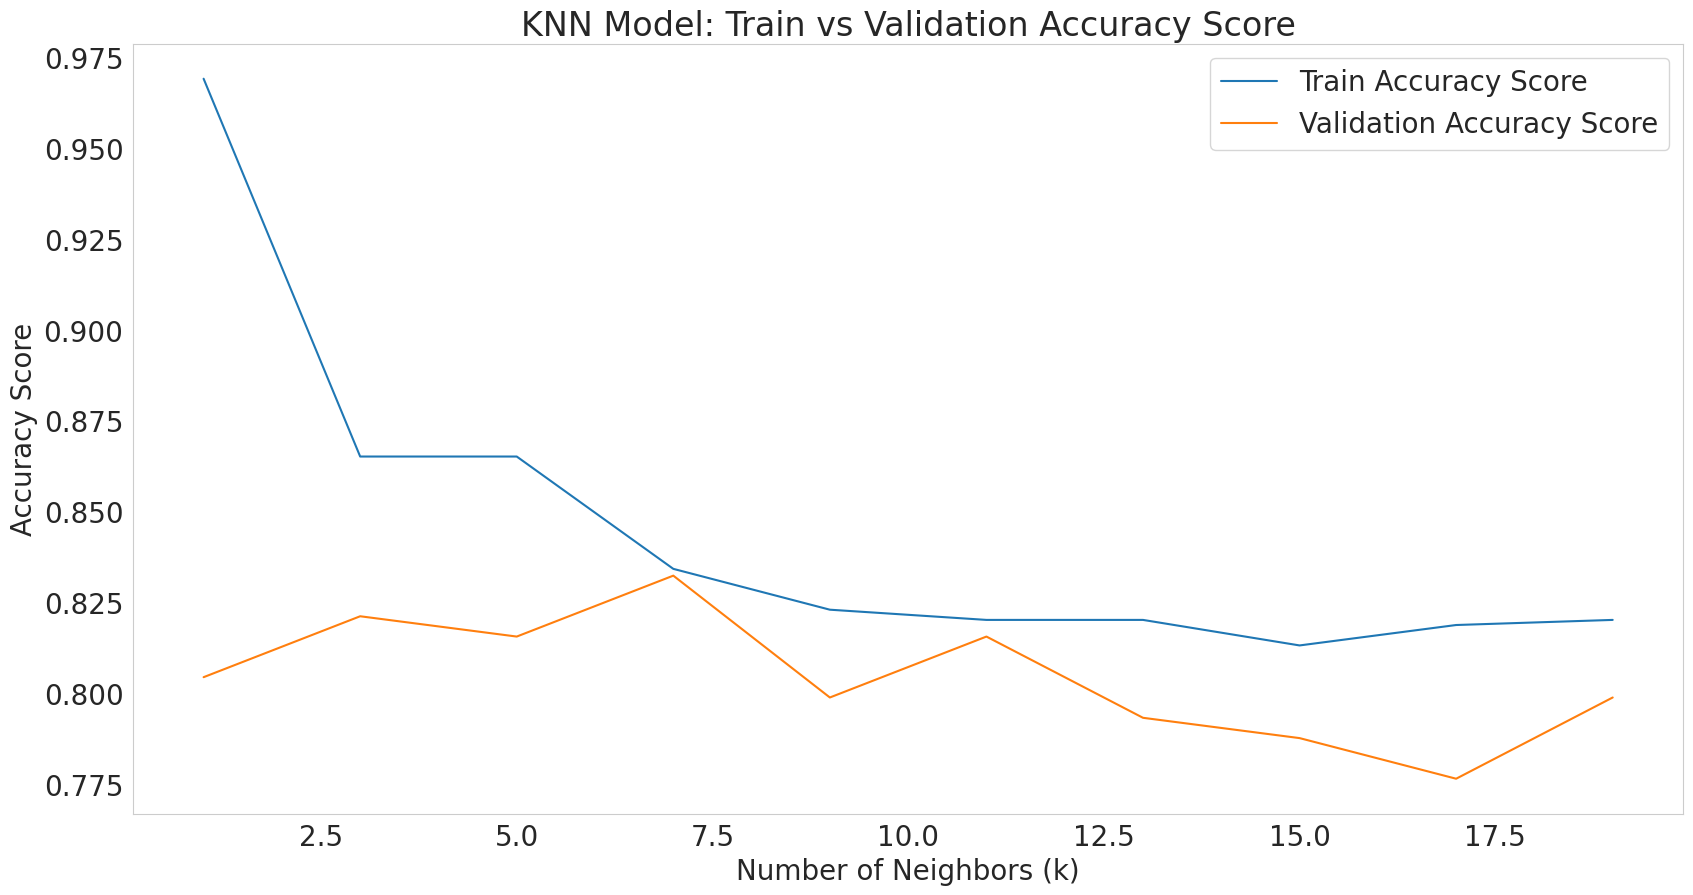

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

k_values = range(1, 21, 2)
train_scores = []
val_scores = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_boot, y_train)

    y_train_pred = model.predict(X_boot)
    y_val_pred = model.predict(X_val_boot)

    train_scores.append(accuracy_score(y_train, y_train_pred))
    val_scores.append(accuracy_score(y_val, y_val_pred))

plt.plot(k_values, train_scores, label='Train Accuracy Score')
plt.plot(k_values, val_scores, label='Validation Accuracy Score')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy Score')
plt.title('KNN Model: Train vs Validation Accuracy Score')
plt.legend()
plt.grid()
plt.show()


The graph above:
 * showing KNN Model: Train vs Validation Accuracy Score, indicates a classic bias-variance trade-off.
 * As the number of neighbors (k) increases, training accuracy decreases (model becomes less complex), while validation accuracy initially rises and then falls, suggesting an optimal balance of underfitting and overfitting exists.
 * The largest gap between training and validation accuracy at lower k values points to overfitting in those regions.

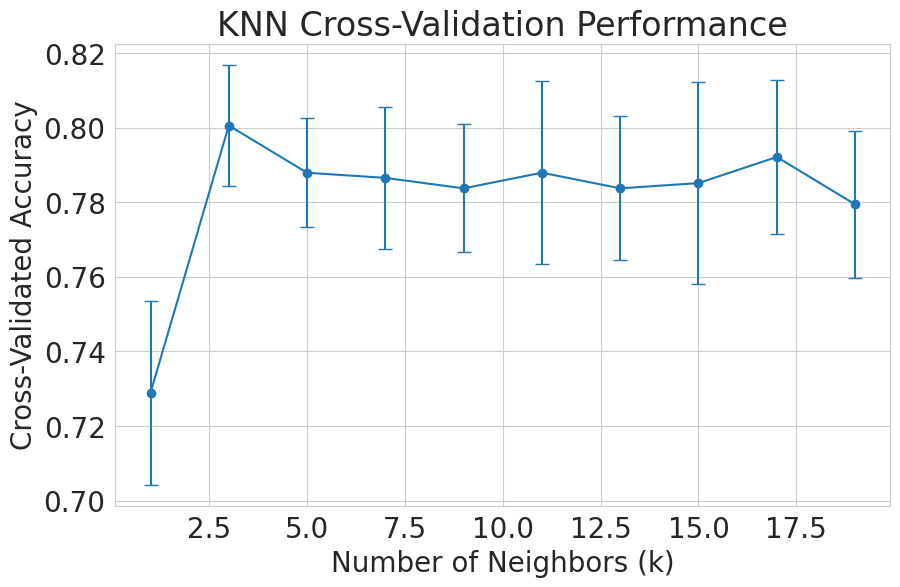

In [ ]:
import matplotlib.pyplot as plt

# Get cross-validation results
results = grid_search.cv_results_
k_values = param_grid['n_neighbors']
mean_scores = results['mean_test_score']
std_scores = results['std_test_score']

# Plot accuracy with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(k_values, mean_scores, yerr=std_scores, fmt='o-', capsize=5)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('KNN Cross-Validation Performance')
plt.grid(True)
plt.show()



This "KNN Cross-Validation Performance" graph above:
 * shows that the model's accuracy generally improves significantly from k=1 to k=2.5, reaching a peak.
 * Beyond this point, the cross-validated accuracy remains relatively stable, hovering around 0.78-0.80, with overlapping error bars indicating similar performance across higher k values.
 * This suggests that while very small k values are unstable, a broader range of larger k values yield comparable and robust results.

<ipython-input-42-fad88120c48d>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


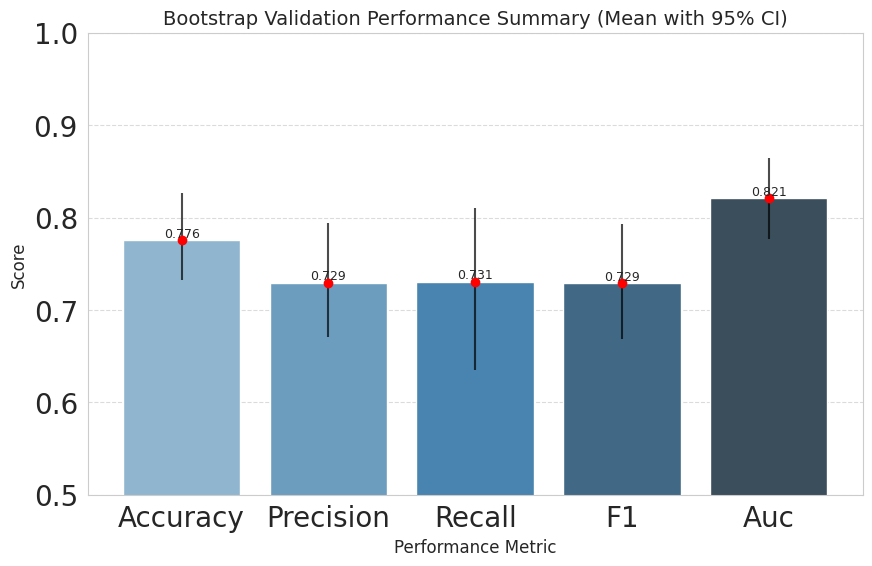

In [ ]:
plot_data = []
for metric, values in boot_summary.items():
    plot_data.append({
        'Metric': metric.capitalize(),
        'Mean': values['mean'],
        'Std': values['std'],
        'CI_Lower': values['95% CI'][0],
        'CI_Upper': values['95% CI'][1]
    })
boot_summary_df = pd.DataFrame(plot_data)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=boot_summary_df,
    x='Metric',
    y='Mean',
    palette='Blues_d',
    errorbar=None # We will manually draw confidence intervals
)

# A more direct way to plot confidence intervals as vertical lines
for index, row in boot_summary_df.iterrows():
    plt.vlines(x=index, ymin=row['CI_Lower'], ymax=row['CI_Upper'],
               color='black', linestyle='-', linewidth=1.5, alpha=0.7)
    plt.plot(index, row['Mean'], 'o', color='red', markersize=6) # Mark the mean

# Add titles and labels
plt.title('Bootstrap Validation Performance Summary (Mean with 95% CI)', fontsize=14)
plt.xlabel('Performance Metric', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.ylim(0.5, 1.0) # Set a reasonable y-limit for scores

# Add mean values on top of bars
for index, row in boot_summary_df.iterrows():
    plt.text(index, row['Mean'], f'{row["Mean"]:.3f}', ha='center', va='bottom', fontsize=9)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Based on the graph above:
* The bootstrap validation confirms that our KNN model exhibits **stable and reliable performance.**

* The narrow black lines representing the 95% Confidence Intervals indicate **low variability** across the bootstrap samples, suggesting consistent results.

* the **AUC score consistently ranks highest**, highlighting the model's strong ability to differentiate between the two classes(survival or not survival).


## bootstrap results:

**Robust Performance:** Bootstrap provided a more reliable measure of our KNN model's performance by averaging metrics across 100 iterations, reducing reliance on a single split.

**Consistent Results:** The low standard deviation values indicate that our model's performance remains consistent across different data resamples.

**Confidence in Scores:** The 95% Confidence Intervals offer a range where the true performance of our model likely lies for each metric.

**Good Discriminatory Power:** The mean AUC of 0.8211 suggests our model effectively distinguishes between survivors and non-survivors.

**hyperparameter tuning process**: Using 5-fold cross-validation, the optimal setting for the KNN model was identified as n_neighbors = 3, achieving a cross-validation accuracy of 0.8006. This model configuration is optimized.

# 3. Confusion Matrix & KPI Evaluation
In this section, we compute the Confusion Matrix to evaluate the classification performance of our logistic regression model on the validation set.

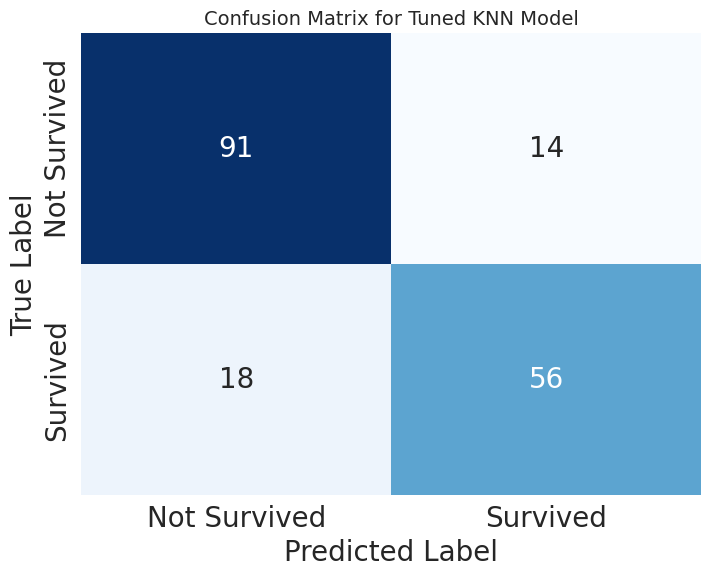

In [ ]:
from sklearn.metrics import confusion_matrix

# Make predictions on the validation set using the best tuned model
y_pred_final = best_knn_tuned_model.predict(X_val_boot)

# Generate the confusion matrix
cm = confusion_matrix(y_val, y_pred_final)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Tuned KNN Model', fontsize=14)
plt.show()

The confusion matrix reveals our model successfully identified 91 non-survivors (True Negatives) and 56 survivors (True Positives). It made 14 false positive errors (incorrectly predicting survival) and 18 false negative errors (failing to predict actual survivors). Overall, the model demonstrates a good ability to distinguish between the two classes with a balanced performance.

## Model Evaluation

To evaluate the quality of the trained model, we calculate several key metrics on both the training and validation sets.

* *Accuracy:* The ratio of accurate predictions to the total number of predictions made.

* *Precision:* The percentage of positive identifications that were accurate.

* *Recall:* The percentage of actual positive cases that were accurately identified.

* *F1 Score:* The harmonic mean of precision and recall is a valuable metric, especially in imbalanced datasets.

* *AUC:* Indicates how well the model can distinguish between classes at all thresholds.

In [ ]:
y_train_pred = best_knn_tuned_model.predict(X_boot)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, zero_division=0)
train_recall = recall_score(y_train, y_train_pred, zero_division=0)
train_f1 = f1_score(y_train, y_train_pred, zero_division=0)
train_auc = roc_auc_score(y_train, y_train_pred)
print(f"Train Accuracy: {train_accuracy}")
print(f"Train Precision: {train_precision}")
print(f"Train Recall: {train_recall}")
print(f"Train F1: {train_f1}")
print(f"Train AUC: {train_auc}")

Train Accuracy: 0.8651685393258427
Train Precision: 0.8412698412698413
Train Recall: 0.7910447761194029
Train F1: 0.8153846153846154
Train AUC: 0.8504773430146564


In [ ]:
val_accuracy = accuracy_score(y_val, y_pred_final)
val_precision = precision_score(y_val, y_pred_final, zero_division=0)
val_recall = recall_score(y_val, y_pred_final, zero_division=0)
val_f1 = f1_score(y_val, y_pred_final, zero_division=0)
val_auc = roc_auc_score(y_val, y_pred_final)
print(f"Validation Accuracy: {val_accuracy}")
print(f"Validation Precision: {val_precision}")
print(f"Validation Recall: {val_recall}")
print(f"Validation F1: {val_f1}")
print(f"Validation AUC: {val_auc}")

Validation Accuracy: 0.8212290502793296
Validation Precision: 0.8
Validation Recall: 0.7567567567567568
Validation F1: 0.7777777777777778
Validation AUC: 0.8117117117117117


## Load The Test And Submit
Upload and manage the test file for submission to the Kaggle website.

In [ ]:
test_df = pd.read_csv("/content/drive/MyDrive/test.csv")
display(test_df.head())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
final_test_df = test_df.copy()
passenger_id_col = final_test_df['PassengerId']
final_test_df = handle_missing_values(final_test_df)
display(final_test_df.head())


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [ ]:
final_test_df['Fare'] = final_test_df['Fare'].fillna(final_test_df['Fare'].median())


In [ ]:
final_test_df['Sex'] = final_test_df['Sex'].map({'male': 0, 'female': 1})
encoded_test_df = pd.get_dummies(final_test_df['Embarked'],drop_first = False, dtype=int)
final_test_df = pd.concat([final_test_df,encoded_test_df],axis = 1)
final_test_df.drop('Embarked', axis=1, inplace=True)



In [ ]:

final_test_df = add_extra_fetures(final_test_df)
display(final_test_df.head())


,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S,FamilySize,IsAlone,Fare_Per_Person,AgeGroup
0,3,0,34.5,0,0,7.8292,0,1,0,1,1,7.829200,1
1,3,1,47.0,1,0,7.0000,0,0,1,2,0,3.500000,1
2,2,0,62.0,0,0,9.6875,0,1,0,1,1,9.687500,2
3,3,0,27.0,0,0,8.6625,0,0,1,1,1,8.662500,1
4,3,1,22.0,1,1,12.2875,0,0,1,3,0,4.095833,1


In [ ]:
final_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Pclass           418 non-null    int64  
 1   Sex              418 non-null    int64  
 2   Age              418 non-null    float64
 3   SibSp            418 non-null    int64  
 4   Parch            418 non-null    int64  
 5   Fare             418 non-null    float64
 6   C                418 non-null    int64  
 7   Q                418 non-null    int64  
 8   S                418 non-null    int64  
 9   FamilySize       418 non-null    int64  
 10  IsAlone          418 non-null    int64  
 11  Fare_Per_Person  418 non-null    float64
 12  AgeGroup         418 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 42.6 KB


In [ ]:

X_test = final_test_df[best_knn_features_backward_train_df]

test_predictions = best_knn_tuned_model.predict(X_test)

submission = pd.DataFrame({
    'PassengerId': passenger_id_col,
    'Survived': test_predictions
})
submission.to_csv('submission.csv', index=False)
print("submission.csv created successfully!")

submission.csv created successfully!


# 4. Leaderboard and ScreenShots
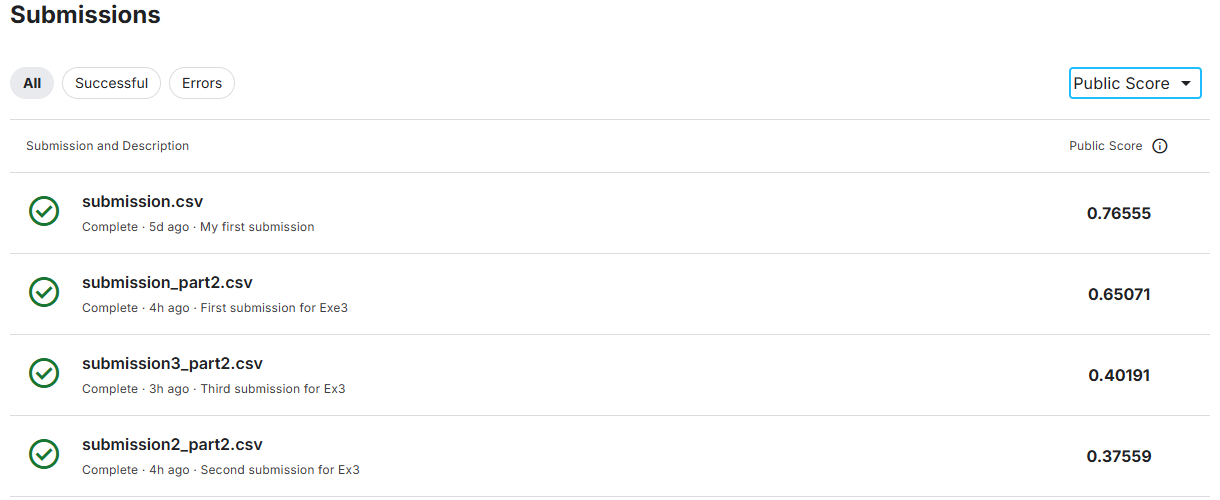

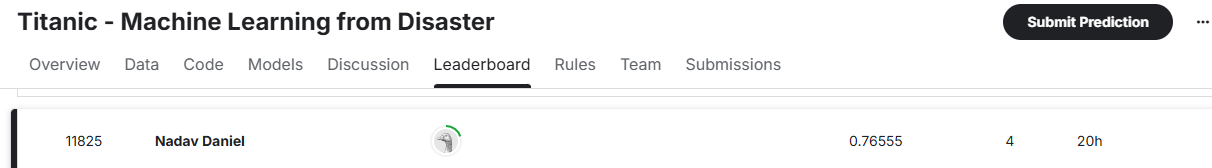

# 5. Summary

This project focused on predicting Titanic survival, implementing a comprehensive machine learning pipeline. Key steps included:

* Feature Engineering: Creation of insightful new features like FamilySize, IsAlone, Fare_Per_Person, and AgeGroup to enhance predictive power.

* We selected KNN and SVM for this assignment due to their ability to handle non-linear relationships and high-dimensional data after feature encoding. KNN is intuitive and effective for local pattern detection, while SVM is known for its strong performance with clear margins between classes. Both models benefit significantly from standardized and PCA-transformed data, which aligns well with our preprocessing pipeline.


* The logistic regression model from Exercise 2 predicted survival more accurately than the KNN model.

* Feature Selection: Application of Backward Feature Selection with the KNN model to identify the most impactful subset of features from the engineered dataset.

* Model Optimization: Hyperparameter tuning of the KNN model using GridSearchCV and cross-validation to find the optimal n_neighbors.

* Robust Evaluation: Validation of the tuned model's performance using Bootstrap resampling, providing stable KPI estimates (Accuracy, Precision, Recall, F1, AUC) and confidence intervals, followed by a detailed Confusion Matrix analysis.

The project built a robust machine learning solution, demonstrating proficiency in data preprocessing, feature engineering, model selection, tuning, and evaluation techniques.

#  6. References
 https://www.kaggle.com/c/titanic

 https://www.kaggle.com/c/titanic/data

 https://www.kaggle.com/c/titanic/notebooks

 https://en.wikipedia.org/wiki/Precision_and_recall